Noteboo to show how to use a Principal Component regressor

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pylab as plt

X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/3, random_state=0)

In [2]:
from my_sklearn_tools.pca_regressors import PCARegression, PCARegressionCV

In [3]:
help(PCARegression)
help(PCARegressionCV)

Help on class PCARegression in module my_sklearn_tools.pca_regressors:

class PCARegression(builtins.object)
 |  PCARegression(scale=False, cache_dir=False, verbose=0)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, scale=False, cache_dir=False, verbose=0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  build(self, reg_type)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)

Help on class PCARegressionCV in module my_sklearn_tools.pca_regressors:

class PCARegressionCV(builtins.object)
 |  PCARegressionCV(scale=False, cv=None, n_jobs=None, cache_dir=True, verbose=0)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, scale=False, cv=None, n_jobs=None, cache_dir=True, verbose=0)
 |      Initialize self.  See help(type(self)) for ac

In [4]:
pca_reg = PCARegression().build(reg_type='lasso')
pca_reg

Pipeline(steps=[('variancethreshold', VarianceThreshold()), ('pca', PCA()),
                ('lasso', Lasso(max_iter=1000000.0))])

In [5]:
pca_reg_cv = PCARegressionCV(cache_dir=False, cv=5).build(reg_type='lasso')
pca_reg_cv

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('variancethreshold',
                                        VarianceThreshold()),
                                       ('pca', PCA()),
                                       ('lasso', Lasso(max_iter=1000000.0))]),
             param_grid={'lasso__alpha': array([1.00000000e-04, 1.14975700e-04, 1.32194115e-04, 1.51991108e-04,
       1.74752840e-04, 2.00923300e-04, 2.31012970e-04, 2.65608778e-04,
       3.05385551e-04, 3.51119173e-04, 4.03701726e-04, 4.64158883e-0...
       4.03701726e+00, 4.64158883e+00, 5.33669923e+00, 6.13590727e+00,
       7.05480231e+00, 8.11130831e+00, 9.32603347e+00, 1.07226722e+01,
       1.23284674e+01, 1.41747416e+01, 1.62975083e+01, 1.87381742e+01,
       2.15443469e+01, 2.47707636e+01, 2.84803587e+01, 3.27454916e+01,
       3.76493581e+01, 4.32876128e+01, 4.97702356e+01, 5.72236766e+01,
       6.57933225e+01, 7.56463328e+01, 8.69749003e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_e

In [6]:
pca_reg.fit(X_train, y_train)
r2_score(y_test, pca_reg.predict(X_test))

0.3103231634116773

In [7]:
pca_reg_cv.fit(X_train, y_train)
r2_score(y_test, pca_reg_cv.predict(X_test))

0.45128528554471004

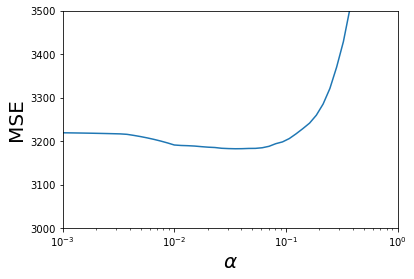

In [8]:
plt.plot(pca_reg_cv.param_grid['lasso__alpha'], 
         -pca_reg_cv.cv_results_['mean_test_score'])
plt.xscale('log')
plt.ylim([3000, 3500])
plt.xlim([0.001, 1])
plt.xlabel(r'$\alpha$', size=20)
plt.ylabel("MSE", size=20)
pass